## AirB&B Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Preliminary exploration


To preview dataframe

In [9]:
df = pd.read_csv('MontrealAirB&B_cleaned.csv')
df.head(5)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Le Plateau-Mont-Royal,45.530692,-73.585878,Private room,39,2,228
1,Le Sud-Ouest,45.484419,-73.579225,Private room,30,1,266
2,Le Plateau-Mont-Royal,45.541353,-73.578139,Entire home/apt,147,3,356
3,Ville-Marie,45.518885,-73.565463,Entire home/apt,94,3,319
4,Ville-Marie,45.520195,-73.564219,Entire home/apt,145,4,363


Determine how many records

In [10]:
df.index

RangeIndex(start=0, stop=19426, step=1)

Retrieve exact names of columns

In [11]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365'],
      dtype='object')

We are aiming to get:
- total number of offers, 
- average price of all offers
- average minimum nights
- average price per each type of room
- average minimum nights per each type of room
versus heighbourhood

In [12]:
n_count = df.groupby("neighbourhood", as_index=False)["price"].count().rename(columns={'price':'count'})
n_count

n_avg_price = df.groupby("neighbourhood", as_index=False)["price"].mean().rename(columns={'price':'average_price'})
n_avg_price

n_avg_min_stay = df.groupby("neighbourhood", as_index=False)["minimum_nights"].mean().rename(columns={'minimum_nights':'avg_min_stay'})
n_avg_min_stay

n_home = pd.crosstab(df['neighbourhood'],df['room_type'], values = df['price'], aggfunc='mean', margins=True)
n_home.rename(columns={'Entire home/apt': 'Entire home/apt (avg_price)', 
                       'Private room': 'Private room (avg_price)',
                       'Shared room': 'Shared room (avg_price)'}, inplace=True)
n_home = n_home[n_home.columns.drop('All')]
n_home.fillna(0, inplace=True)
n_home

n_count_home = pd.crosstab(df['neighbourhood'],df['room_type'], values = df['room_type'], aggfunc='count', margins=True)
n_count_home.rename(columns={'Entire home/apt': 'Entire home/apt (count)', 
                       'Private room': 'Private room (count)',
                       'Shared room': 'Shared room (count)'}, inplace=True)
n_count_home = n_count_home[n_count_home.columns.drop('All')]
n_count_home.fillna(0, inplace=True)
n_count_home

#merging dataframes

data1 = pd.merge(n_count, n_avg_price, 'left', on = ["neighbourhood"])
data1
data2 = pd.merge(data1, n_avg_min_stay, 'left', on = ["neighbourhood"])
data2
data3 = pd.merge(data2, n_home, 'left', on = ["neighbourhood"])
data3
final_data = pd.merge(data3, n_count_home, 'left', on = ["neighbourhood"])
final_data
fd = final_data
fd.head(10)

,neighbourhood,count,average_price,avg_min_stay,Entire home/apt (avg_price),Private room (avg_price),Shared room (avg_price),Entire home/apt (count),Private room (count),Shared room (count)
0,Ahuntsic-Cartierville,310,78.864516,6.690323,92.968468,43.906977,16.500000,222.0,86.0,2.0
1,Anjou,53,73.867925,11.113208,94.562500,42.333333,0.000000,32.0,21.0,0.0
2,Baie-d'Urfé,7,383.428571,2.571429,430.666667,100.000000,0.000000,6.0,1.0,0.0
3,Beaconsfield,15,59.133333,2.333333,96.666667,49.750000,0.000000,3.0,12.0,0.0
4,Côte-Saint-Luc,64,116.343750,2.578125,146.300000,67.782609,35.000000,40.0,23.0,1.0
5,Côte-des-Neiges-Notre-Dame-de-Grâce,1284,88.694704,9.158100,117.948819,46.361277,37.142857,762.0,501.0,21.0
6,Dollard-des-Ormeaux,43,98.883721,3.651163,161.882353,52.909091,84.000000,17.0,22.0,4.0
7,Dorval,63,125.952381,7.460317,181.454545,64.900000,0.000000,33.0,30.0,0.0
8,Hampstead,23,205.043478,10.130435,291.933333,50.166667,18.000000,15.0,6.0,2.0
9,Kirkland,10,93.000000,3.000000,125.400000,60.600000,0.000000,5.0,5.0,0.0


In [48]:
fd.nsmallest(1,"count")

,neighbourhood,count,average_price,avg_min_stay,Entire home/apt (avg_price),Private room (avg_price),Shared room (avg_price),Entire home/apt (count),Private room (count),Shared room (count)
28,Senneville,1,677.0,2.0,677.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Delete row with abnormally high price 677.0 from Senneville
df = df[df['neighbourhood'] != 'Senneville']
# fd.sort_values('count')


In [51]:
#Save data to file
df.to_csv('MontrealAirB&B_cleaned_processed.csv')

#### Descriptive analytics. Simple visualization.

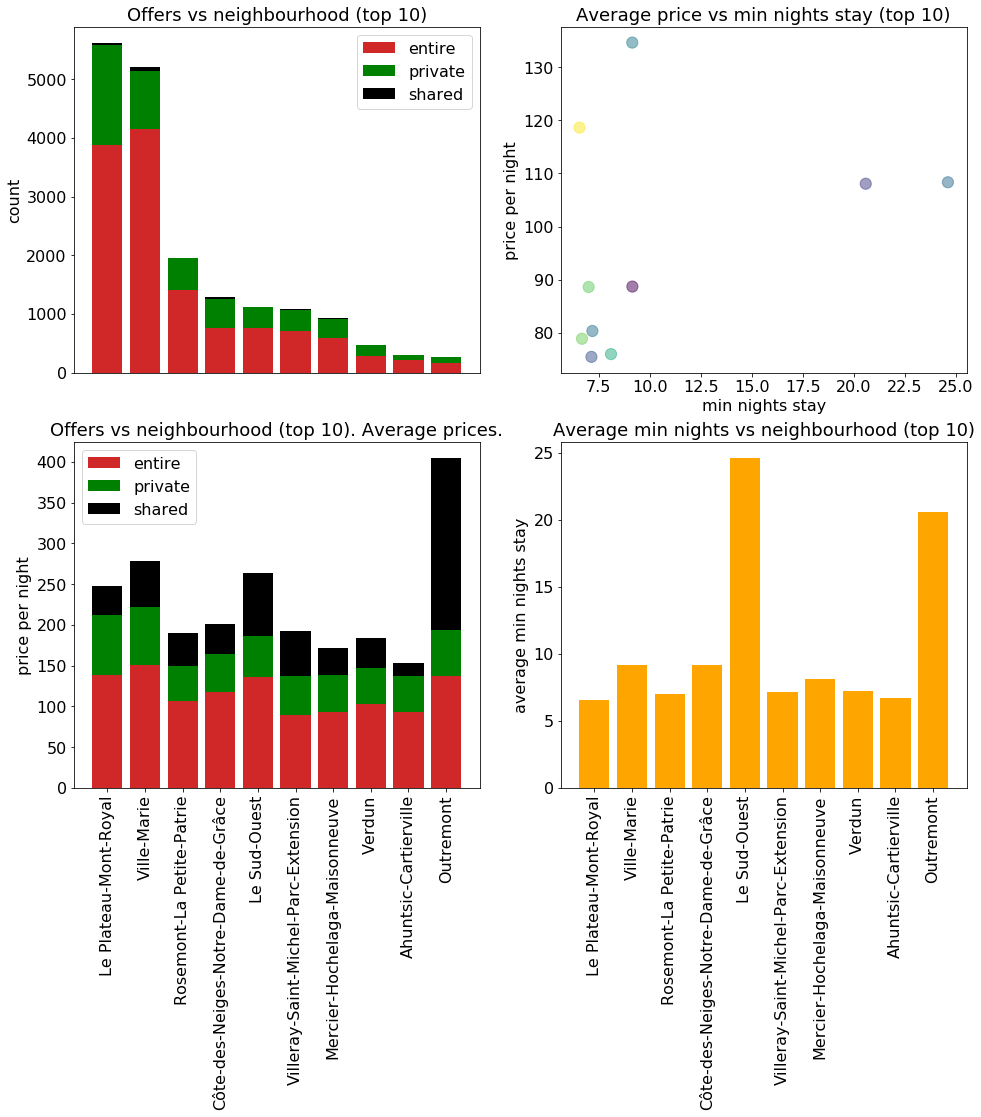

In [13]:
plt.figure(figsize=(16, 14))

#take first 10 districts based on the number of offers
fd1 = fd.nlargest(10,"count")

#left top plot
plt.subplot(221)

entire = fd1["Entire home/apt (count)"]
private = fd1["Private room (count)"]
shared = fd1["Shared room (count)"]

ind = np.arange(10)  

p1 = plt.bar(ind, entire, color='#d02728')
p2 = plt.bar(ind, private,  bottom=entire, color='green')
p3 = plt.bar(ind, shared, bottom=entire+private, color='black')

plt.ylabel('count', fontsize=16)
plt.xticks([], fontsize=16)
plt.yticks(fontsize=16)
plt.title("Offers vs neighbourhood (top 10)", fontsize=18)
plt.legend((p1[0], p2[0], p3[0]), ('entire', 'private', "shared"), fontsize=16)

# left bottom plot
plt.subplot(223)

entire = fd1["Entire home/apt (avg_price)"]
private = fd1["Private room (avg_price)"]
shared = fd1["Shared room (avg_price)"]

ind = np.arange(10)  

p1 = plt.bar(ind, entire, color='#d02728')
p2 = plt.bar(ind, private,  bottom=entire, color='green')
p3 = plt.bar(ind, shared, bottom=entire+private, color='black')

plt.ylabel('price per night', fontsize=16)
plt.xticks(ind, fd1["neighbourhood"], fontsize=16, rotation=90)
plt.yticks(fontsize=16)

plt.title("Offers vs neighbourhood (top 10). Average prices.", fontsize=18)
plt.legend((p1[0], p2[0], p3[0]), ('entire', 'private', "shared"), fontsize=16)

# top right plot
plt.subplot(222)

colors = np.random.rand(10)
ax3 = plt.scatter(fd1["avg_min_stay"], fd1["average_price"], s = 125, c = colors, alpha=0.5)
plt.title("Average price vs min nights stay (top 10)", fontsize=18)
plt.ylabel('price per night', fontsize=16)
plt.xlabel('min nights stay', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#bottom right plot
plt.subplot(224)

ax4=plt.bar(fd1["neighbourhood"], fd1["avg_min_stay"], align='center', color="orange")
plt.xticks(rotation="vertical", fontsize=16)
plt.title("Average min nights vs neighbourhood (top 10)", fontsize=18)
plt.ylabel('average min nights stay', fontsize=16)
plt.yticks(fontsize=16)


plt.show()

Placing some data on the georaphical map (placing all data takes too much processing time/memory)

In [36]:
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()

map = folium.Map(location=[45.5017, -73.5673], zoom_start=13) #coordinates of Montreal
# map
for point in range(0, len(locationlist)-19350):
    folium.Marker(locationlist[point], popup=df['neighbourhood'][point]).add_to(map)
map

<font color=blue>***Current project will be focused on the use case concerning prediction of the price per night of renting property on AirBnB. Prediction will be based on analysis of property location, type of room and minimum nights stay. Application that estimates the renting price can be useful both for hosts who are willing to use AirBnB service and for users of AirBnB service when they need to estimate thier budget for accomodation based on search criteria.***</font>